In [62]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

import requests
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [19]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | mentok
City not found. Skipping...
Processing Record 3 of Set 1 | trairi
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | maridi
Processing Record 10 of Set 1 | brokopondo
Processing Record 11 of Set 1 | muyezerskiy
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | port elizabeth
Proce

Processing Record 35 of Set 4 | dalvik
Processing Record 36 of Set 4 | salalah
Processing Record 37 of Set 4 | sabana de torres
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | bud
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | merrill
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | haines junction
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | nova zagora
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | calatayud
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | saurimo
Processing Record 50 of Set 4 | oranjemund
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nguiu
City not found. Skipping...
Processing Record 3 of Set 5 | te anau
Processing Record 4 of Set 5 | masuguru
Processing Record 5 of Set 5 | kagadi
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | ahipara
Processin

Processing Record 22 of Set 8 | horlivka
Processing Record 23 of Set 8 | inuvik
Processing Record 24 of Set 8 | leon
Processing Record 25 of Set 8 | zhezkazgan
Processing Record 26 of Set 8 | qixingtai
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | manzhouli
Processing Record 29 of Set 8 | sekoma
Processing Record 30 of Set 8 | obihiro
Processing Record 31 of Set 8 | samarai
Processing Record 32 of Set 8 | ballina
Processing Record 33 of Set 8 | kalmunai
Processing Record 34 of Set 8 | pisco
Processing Record 35 of Set 8 | baikunthpur
Processing Record 36 of Set 8 | rincon
Processing Record 37 of Set 8 | rylsk
Processing Record 38 of Set 8 | saint-joseph
Processing Record 39 of Set 8 | uaua
Processing Record 40 of Set 8 | nambour
Processing Record 41 of Set 8 | iglino
Processing Record 42 of Set 8 | gat
Processing Record 43 of Set 8 | wembley
Processing Record 44 of Set 8 | vila
Processing Record 45 of Set 8 | axim
Processing Record 46 of Set 8 | iracoubo
Proc

Processing Record 11 of Set 12 | hecun
Processing Record 12 of Set 12 | alofi
Processing Record 13 of Set 12 | kalemie
Processing Record 14 of Set 12 | ardabil
Processing Record 15 of Set 12 | shelburne
Processing Record 16 of Set 12 | iisalmi
Processing Record 17 of Set 12 | port hedland
Processing Record 18 of Set 12 | krasnoselkup
Processing Record 19 of Set 12 | nuuk
Processing Record 20 of Set 12 | safaga
Processing Record 21 of Set 12 | dmitrovsk-orlovskiy
Processing Record 22 of Set 12 | mulege
Processing Record 23 of Set 12 | harper
Processing Record 24 of Set 12 | khandyga
Processing Record 25 of Set 12 | wilmington
Processing Record 26 of Set 12 | pochutla
Processing Record 27 of Set 12 | atar
Processing Record 28 of Set 12 | rigaud
Processing Record 29 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 12 | wanlaweyn
Processing Record 31 of Set 12 | mehriz
Processing Record 32 of Set 12 | sol-iletsk
Processing Record 33 of Set 12 | veinticinco de di

In [21]:
len(city_data)

546

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,84.99,74,75,10.29,US,2020-07-11 19:04:34
1,Trairi,-3.28,-39.27,83.05,64,35,11.72,BR,2020-07-11 19:08:58
2,Kapaa,22.08,-159.32,80.60,69,40,16.11,US,2020-07-11 19:08:58
3,Rikitea,-23.12,-134.97,68.90,68,41,17.72,PF,2020-07-11 19:08:58
4,Kaitangata,-46.28,169.85,50.00,60,100,7.00,NZ,2020-07-11 19:08:59
5,Maridi,4.92,29.47,69.10,93,100,0.54,SS,2020-07-11 19:08:59
6,Brokopondo,4.75,-55.17,87.10,61,0,7.99,SR,2020-07-11 19:08:59
7,Muyezerskiy,63.93,31.65,53.20,96,100,6.44,RU,2020-07-11 19:08:59
8,Faanui,-16.48,-151.75,78.13,77,100,20.62,PF,2020-07-11 19:08:59
9,Katsuura,35.13,140.30,77.00,100,75,17.22,JP,2020-07-11 19:09:00


In [23]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-07-11 19:04:34,41.37,-73.41,84.99,74,75,10.29
1,Trairi,BR,2020-07-11 19:08:58,-3.28,-39.27,83.05,64,35,11.72
2,Kapaa,US,2020-07-11 19:08:58,22.08,-159.32,80.60,69,40,16.11
3,Rikitea,PF,2020-07-11 19:08:58,-23.12,-134.97,68.90,68,41,17.72
4,Kaitangata,NZ,2020-07-11 19:08:59,-46.28,169.85,50.00,60,100,7.00


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594494724.3149629

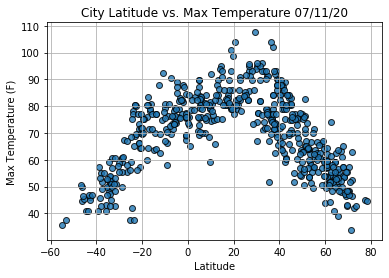

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

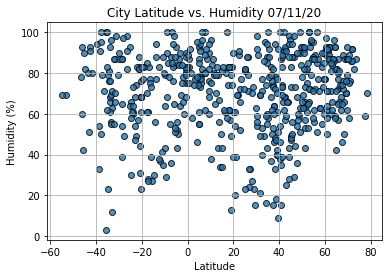

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

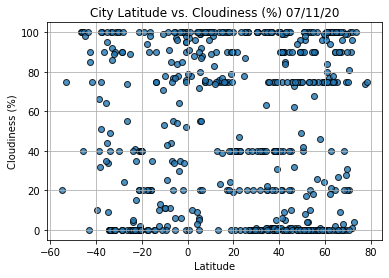

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

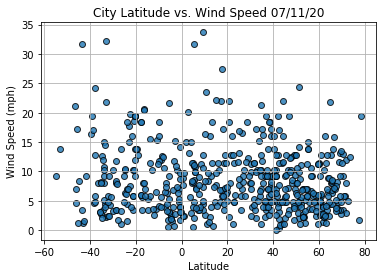

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [55]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [56]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2020-07-11 19:09:00
Lat                        -34.53
Lng                         20.04
Max Temp                       50
Humidity                       76
Cloudiness                      0
Wind Speed                   3.36
Name: 13, dtype: object

In [57]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-07-11 19:04:34,41.37,-73.41,84.99,74,75,10.29
2,Kapaa,US,2020-07-11 19:08:58,22.08,-159.32,80.60,69,40,16.11
5,Maridi,SS,2020-07-11 19:08:59,4.92,29.47,69.10,93,100,0.54
6,Brokopondo,SR,2020-07-11 19:08:59,4.75,-55.17,87.10,61,0,7.99
7,Muyezerskiy,RU,2020-07-11 19:08:59,63.93,31.65,53.20,96,100,6.44


In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

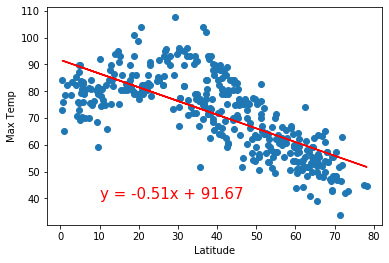

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp', (10,40))

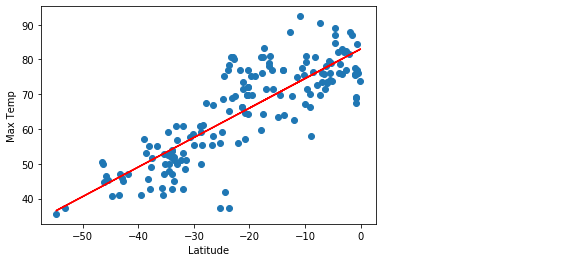

In [64]:
# Linear regression on the Southern Hemisphere
south_x_values = southern_hemi_df["Lat"]
south_y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(south_x_values, south_y_values, 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp', (10,40))

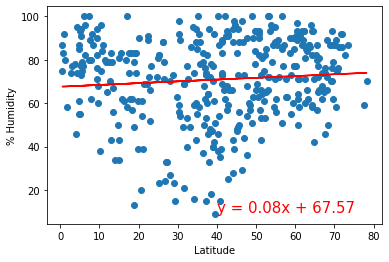

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

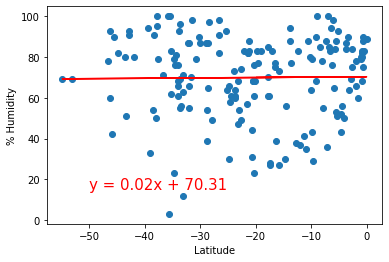

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

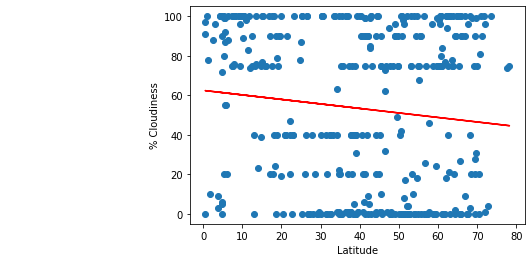

In [68]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

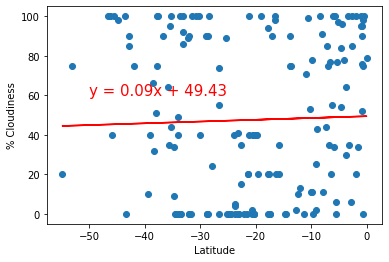

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

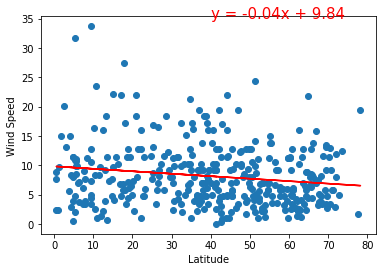

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

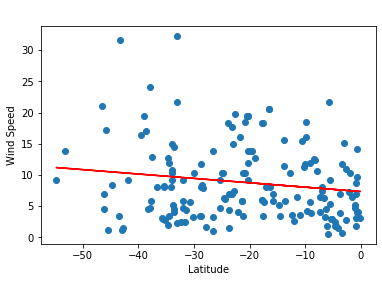

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))